In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('CS513_targeting_cat_full.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Customer  240 non-null    int64 
 1   Age       240 non-null    object
 2   Gender    240 non-null    object
 3   Region    240 non-null    object
 4   Product   240 non-null    object
 5   Purchase  240 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.4+ KB


In [4]:
print(df.isna().sum())

Customer    0
Age         0
Gender      0
Region      0
Product     0
Purchase    0
dtype: int64


In [5]:
df

,Customer,Age,Gender,Region,Product,Purchase
0,1,<30,F,North,A,Yes
1,2,30<50,M,North,B,Yes
2,3,30<50,F,North,B,No
3,4,50<,M,North,B,No
4,5,<30,F,North,A,Yes
...,...,...,...,...,...,...
235,236,30<50,M,West,B,No
236,237,<30,F,West,A,No
237,238,50<,M,West,A,No
238,239,30<50,F,West,B,No


In [6]:
df.describe()

,Customer
count,240.00000
mean,120.50000
std,69.42622
min,1.00000
25%,60.75000
50%,120.50000
75%,180.25000
max,240.00000


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [8]:
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})
df['Product'] = df['Product'].replace({'A': 0, 'B': 1})
# df['Purchase'] = df['Purchase'].replace({'No': 0, 'Yes': 1})
df['Purchase'] = df['Purchase'].astype('category')
df['Age'] = df['Age'].replace({'<30': 0, '30<50': 1, '50<': 2})
df['Region'] = df['Region'].replace({'North': 0, 'South': 1, 'East': 2, 'West': 3})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Customer  240 non-null    int64   
 1   Age       240 non-null    int64   
 2   Gender    240 non-null    int64   
 3   Region    240 non-null    int64   
 4   Product   240 non-null    int64   
 5   Purchase  240 non-null    category
dtypes: category(1), int64(5)
memory usage: 9.9 KB


In [10]:
X = df.drop(['Customer', 'Purchase'], axis=1)
y=df['Purchase']

In [11]:
#Split dataset 70-30% Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)

In [12]:
# Normalize feature variables using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = GaussianNB()
# Model training
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


[[29  9]
 [15 19]]


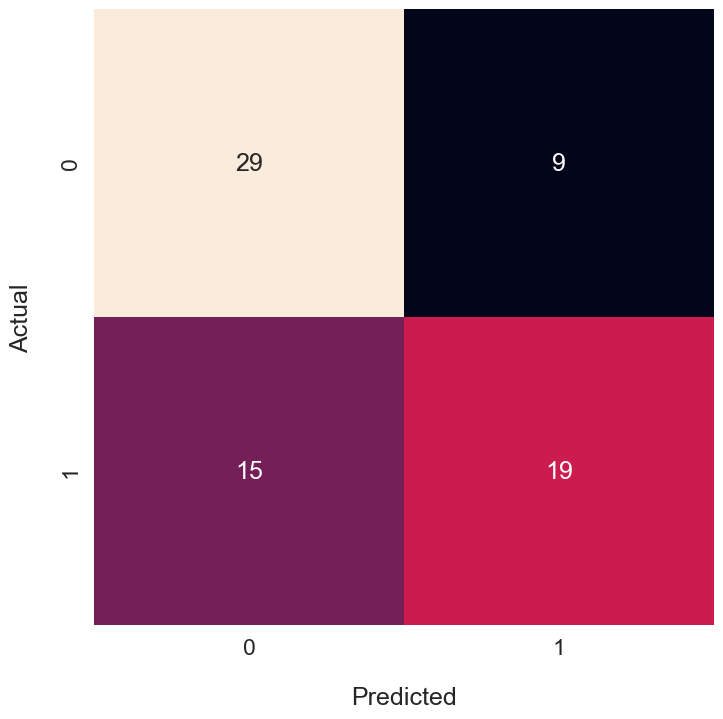

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create confusion matrix and calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)
ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [15]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)

In [16]:
print("specificity: ", specificity)

specificity:  0.7631578947368421


In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Error Rate",1-accuracy)
precision = precision_score(y_test, y_pred,pos_label="Yes")
recall = recall_score(y_test, y_pred,pos_label="Yes")
f1score = f1_score(y_test, y_pred,pos_label="Yes")

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")


Accuracy:  0.6666666666666666
Error Rate 0.33333333333333337
Precision = 0.6785714285714286
Recall = 0.5588235294117647
F1 Score = 0.6129032258064516
